# IMPORT LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
%matplotlib inline

# LOAD&READ DATASET

In [32]:
loan=pd.read_csv(r"C:\Users\User\Downloads\Loan payments data.csv")

In [7]:
loan.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [8]:
loan.tail()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female
499,xqd20160500,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/19/2016 11:58,8.0,28,High School or Below,male


In [9]:
loan.shape

(500, 11)

In [10]:
loan.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')

In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [12]:
loan.describe(include='all')

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
count,500,500,500.000000,500.000000,500,500,400,200.00000,500.000000,500,500
unique,500,3,NaN,NaN,7,25,320,NaN,NaN,4,2
top,xqd20166231,PAIDOFF,NaN,NaN,9/11/2016,10/10/2016,9/26/2016 9:00,NaN,NaN,college,male
freq,1,300,NaN,NaN,231,123,9,NaN,NaN,220,423
mean,NaN,NaN,943.200000,22.824000,NaN,NaN,NaN,36.01000,31.116000,NaN,NaN
std,NaN,NaN,115.240274,8.000064,NaN,NaN,NaN,29.38088,6.084784,NaN,NaN
min,NaN,NaN,300.000000,7.000000,NaN,NaN,NaN,1.00000,18.000000,NaN,NaN
25%,NaN,NaN,1000.000000,15.000000,NaN,NaN,NaN,3.00000,27.000000,NaN,NaN
50%,NaN,NaN,1000.000000,30.000000,NaN,NaN,NaN,37.00000,30.000000,NaN,NaN
75%,NaN,NaN,1000.000000,30.000000,NaN,NaN,NaN,60.00000,35.000000,NaN,NaN


In [13]:
loan.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

# DATA PREPROCESSING

## a)Missing values handling

<Axes: xlabel='past_due_days', ylabel='Count'>

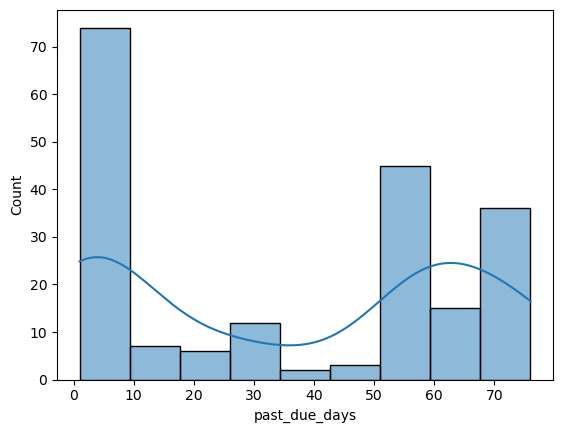

In [14]:
sns.histplot(x='past_due_days',data=loan,kde=True)

In [15]:
loan['past_due_days'].fillna(loan['past_due_days'].median(),inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_1712\3819662763.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan['past_due_days'].fillna(loan['past_due_days'].median(),inplace=True)


In [16]:
loan['paid_off_time'] = loan['paid_off_time'].fillna(loan['paid_off_time'].mode()[0])


In [17]:
loan.isna().sum()

Loan_ID           0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
paid_off_time     0
past_due_days     0
age               0
education         0
Gender            0
dtype: int64

### Groupby

In [18]:
loan.groupby('education')[['past_due_days','terms','Principal','age']].mean()

,past_due_days,terms,Principal,age
education,,,,
Bechalor,35.716418,21.462687,944.776119,32.134328
High School or Below,38.000000,23.631579,951.196172,31.377990
Master or Above,46.250000,11.000000,600.000000,40.250000
college,35.372727,22.686364,941.363636,30.390909


##### Bachelor and college education levels are associated with higher loan principals and relatively shorter pas due days
##### Master or above education level shows a significantly lower principal amount but has the highest past due days indicating that higher education may correlate with longer delays in payment despite lower loan amounts
##### Age is generally higher for those with more advanced education master or above reflecting the age distribution across education levels

### Heatmap

<Axes: >

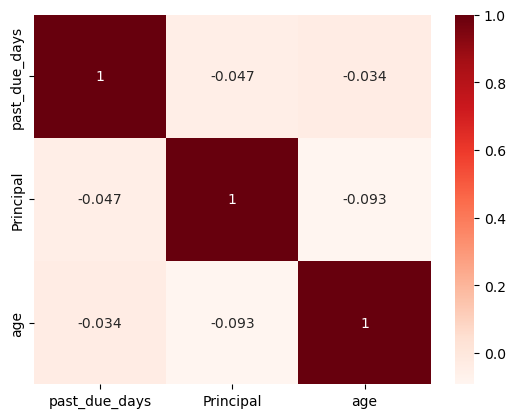

In [19]:
sns.heatmap(loan[['past_due_days','Principal','age']].corr(),annot=True,cmap='Reds')

### Barplot

<Axes: xlabel='education', ylabel='Principal'>

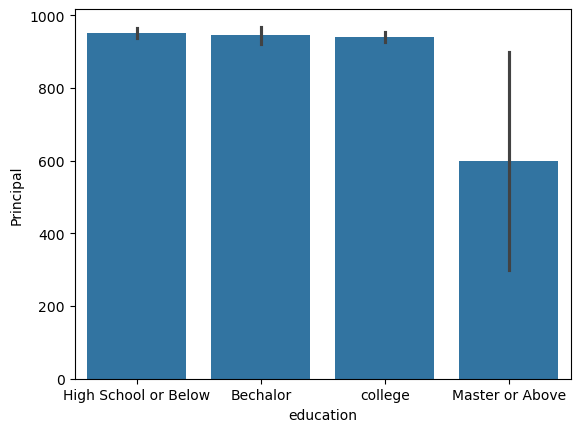

In [39]:
sns.barplot(x='education',y='Principal',data=loan)

##### The principal amount is highest for highschool or below bachalor and college categories
##### The principal is significantly lower for the master or above category

# b)Outlier Ditection

### Clipping

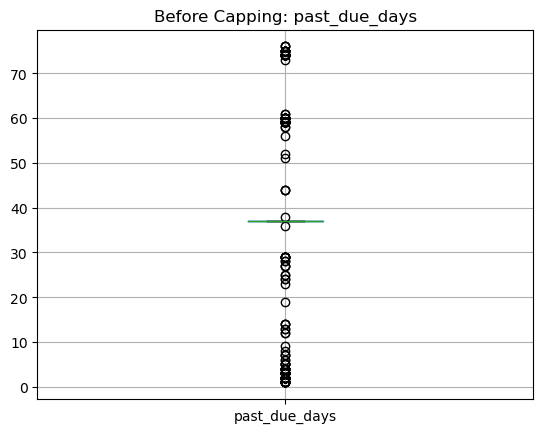

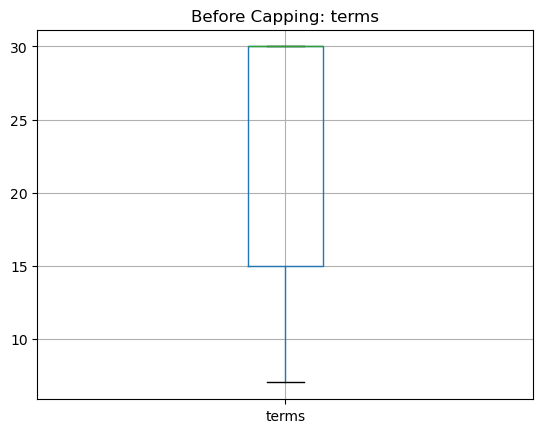

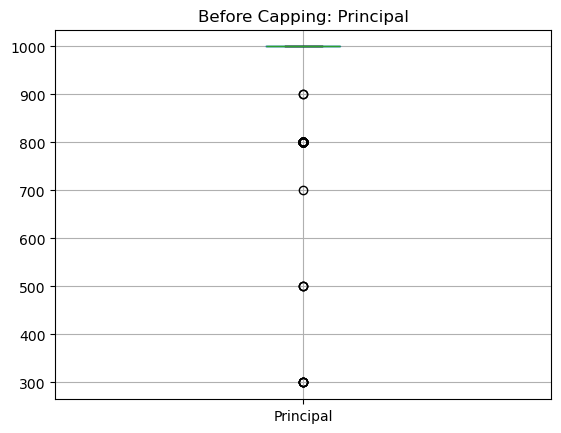

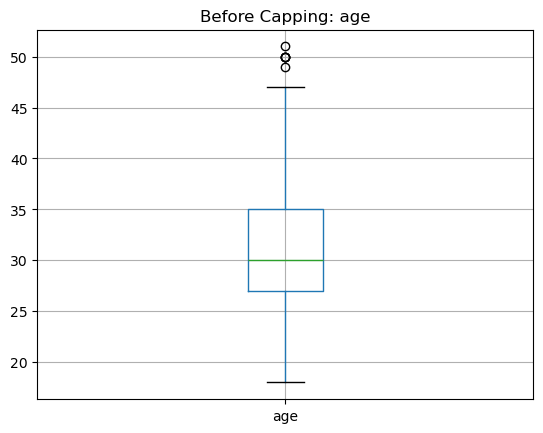

In [21]:
num_cols = ['past_due_days','terms','Principal','age']
for col in num_cols:
    plt.figure()
    loan.boxplot(column=[col])
    plt.title(f"Before Capping: {col}")
    plt.show()

In [22]:
for col in num_cols:
    Q1 = loan[col].quantile(0.25)
    Q3 = loan[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR
    loan[col] = loan[col].clip(lower_cap, upper_cap)


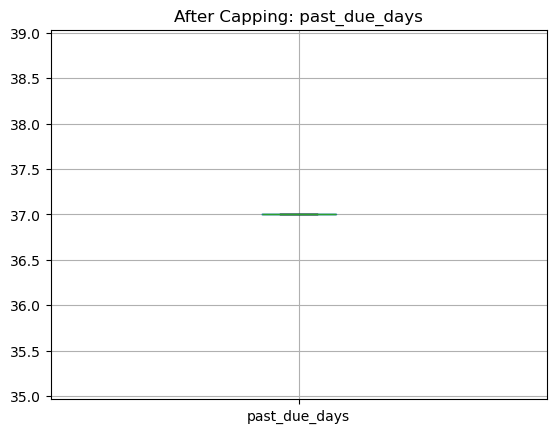

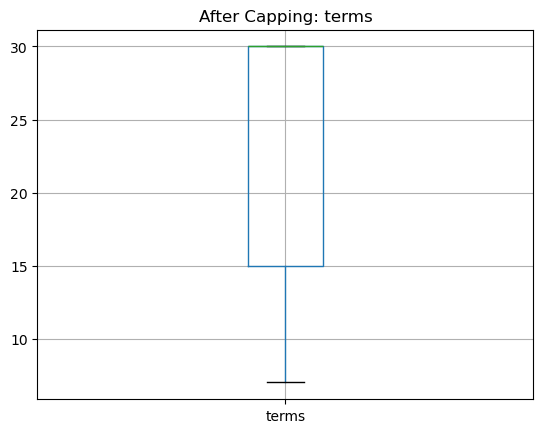

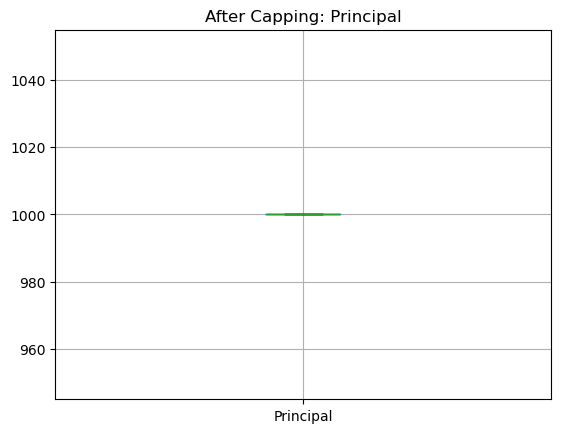

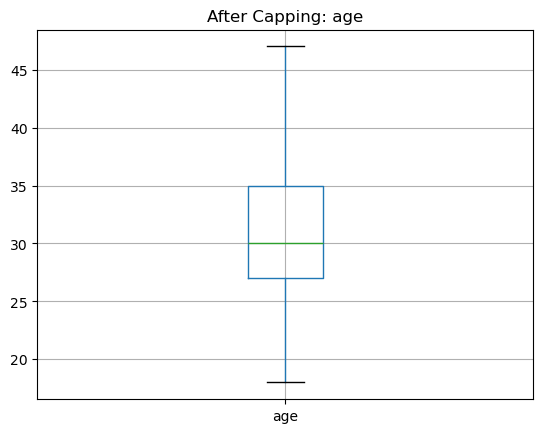

In [23]:
for col in num_cols:
    plt.figure()
    loan.boxplot(column=[col])
    plt.title(f"After Capping: {col}")
    plt.show()

# DATA VISUALISATION

## C)1.Univariate Analysis

### Countplot

<Axes: xlabel='loan_status', ylabel='count'>

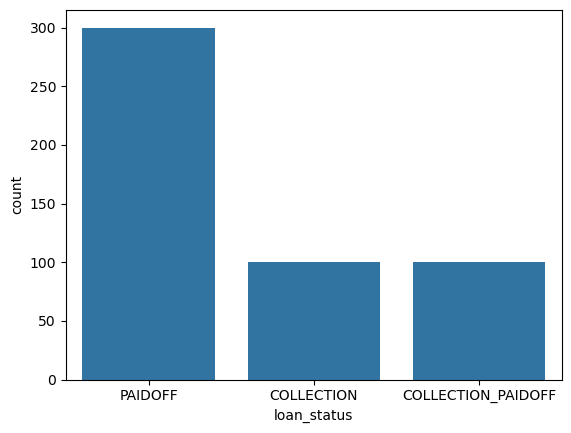

In [24]:
sns.countplot(x='loan_status',data=loan)

##### Most borrowers successfully repay their loans
##### Around two thirds fewer loans end up in collection or collection paid off categories

### Distplot

C:\Users\User\AppData\Local\Temp\ipykernel_1712\701785171.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan['age'],kde=True,bins=10)


<Axes: xlabel='age', ylabel='Density'>

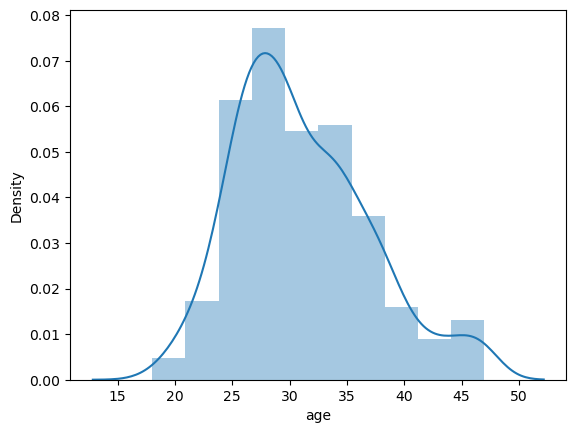

In [25]:
sns.distplot(loan['age'],kde=True,bins=10)

##### people between the ages of 25 and 30 took out the most loans

## 2.Bivariate Analysis

### Boxplot

<Axes: xlabel='loan_status', ylabel='terms'>

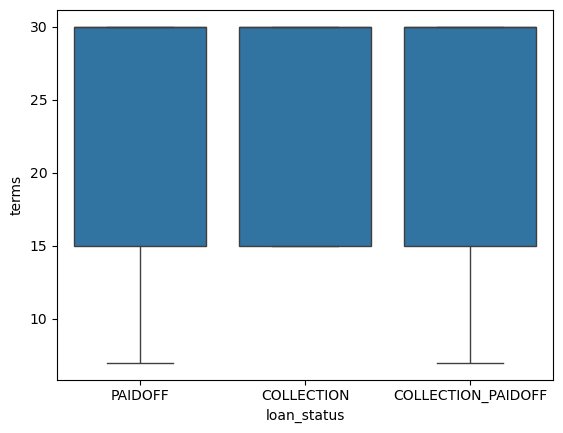

In [26]:
sns.boxplot(x='loan_status',y='terms',data=loan)

### violinplot

C:\Users\User\AppData\Local\Temp\ipykernel_1712\3142147009.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='loan_status',y='age',data=loan,palette='Reds')


<Axes: xlabel='loan_status', ylabel='age'>

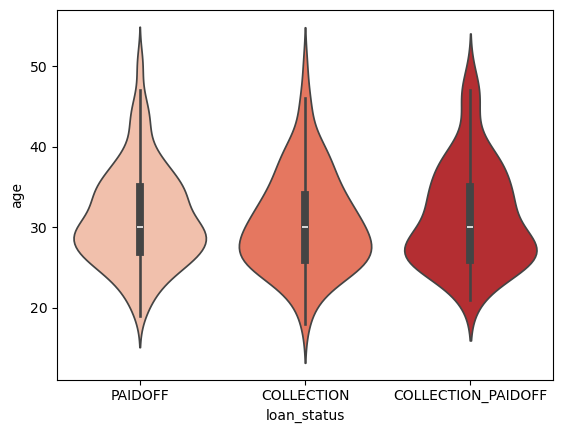

In [38]:
sns.violinplot(x='loan_status',y='age',data=loan,palette='Reds')

##### The principal amount is highest for highschool or below bachalor and college categories
##### The principal is significantly lower for the master or above category

## 3.Multivariate Analysis

### Pairplot

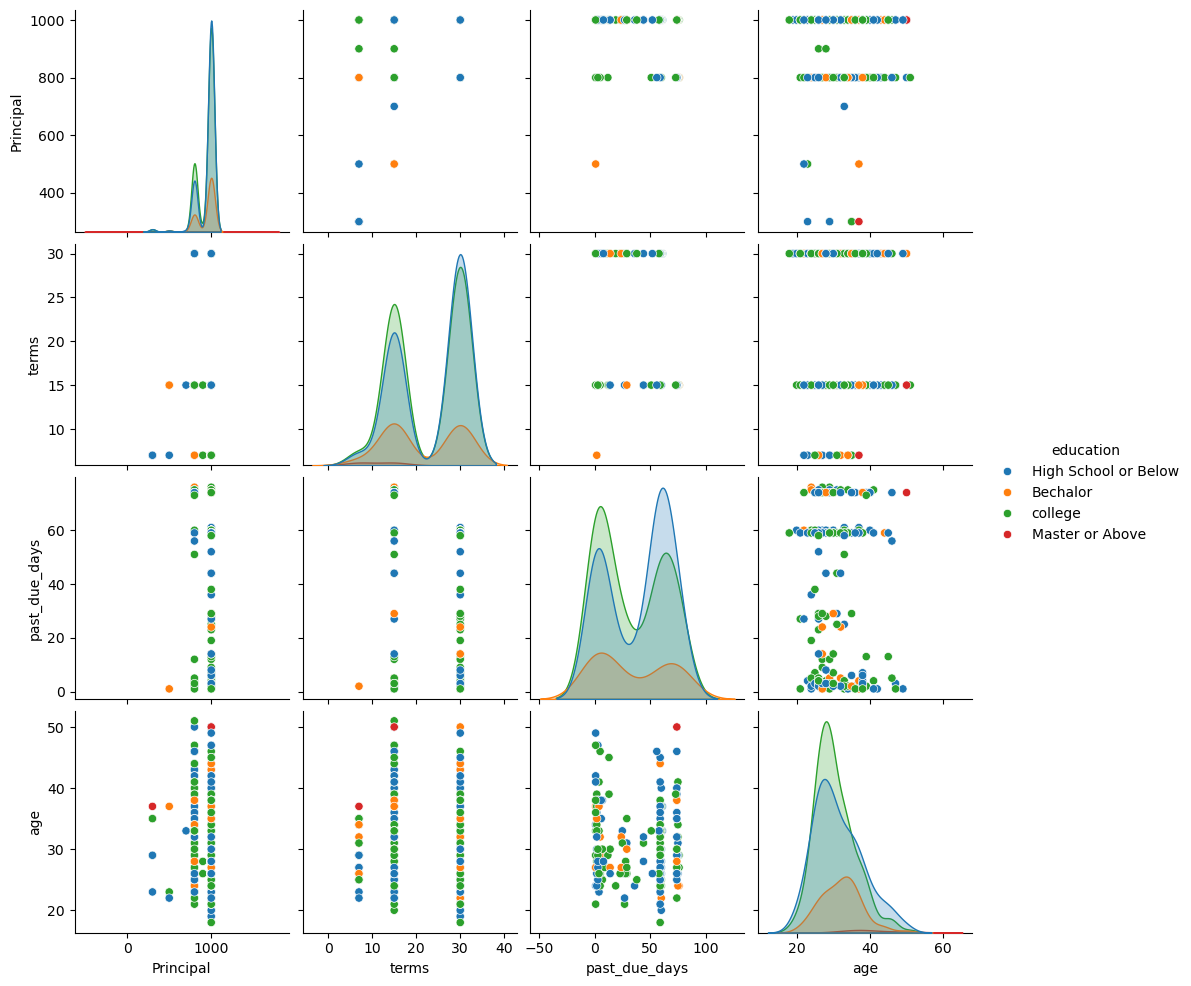

In [33]:
sns.pairplot(loan[['Principal','terms','past_due_days','age','education']],hue='education')